# Машинное обучение в бизнесе: Предсказание объёма нефти в скважинах

## Описание проекта

Задача: Где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищим месторождения, для каждого определяем значения признаков;
- Строим модель и оцениваем объём запасов;
- Выбираем месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

### Описание данных

`id — уникальный идентификатор скважины;`

`f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);`

`product — объём запасов в скважине (тыс. баррелей).`

## План выполнения проекта


1.   Загрузка и подготовка данных. Анализ
2.  Обучение и проверка модели
3.  Подготовка к расчёту прибыли
4. Расчёт прибыли и рисков



# 1. Загрузка и подготовка данных. Анализ

Импортируем необходимые библиотеки для работы

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sns.set()

Импортируем датасеты и записываем в соответсвющие переменные

In [ ]:
data_0 = pd.read_csv('/geo_data_0.csv')
data_1 = pd.read_csv('/geo_data_1.csv')
data_2 = pd.read_csv('/geo_data_2.csv')

Выведем первые 10 строк каждой таблицы

In [ ]:
print('\n\nДанные геологоразведки Регион 0\n')
display(data_0.head(10))
print('\n\nДанные геологоразведки Регион 1\n')
display(data_1.head(10))
print('\n\nДанные геологоразведки Регион 2\n')
display(data_2.head(10))



Данные геологоразведки Регион 0



,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945




Данные геологоразведки Регион 1



,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408




Данные геологоразведки Регион 2



,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


Просмотрим информацию о данных

In [ ]:
print('\n\nИнформация о таблице Регион 0\n')
display(data_0.info())
print('\n\nИнформация о таблице Регион 1\n')
display(data_1.info())
print('\n\nИнформация о таблице Регион 2\n')
display(data_2.info())



Информация о таблице Регион 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None



Информация о таблице Регион 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None



Информация о таблице Регион 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Датасеты заполнены полностью, без пропусков, типы данных в порядке.

Выведем описание данных методом "describe"

In [ ]:
print('\n\nОписание таблицы Регион 0\n')
display(data_0.describe())
print('\n\nОписание таблицы Регион 1\n')
display(data_1.describe())
print('\n\nОписание таблицы Регион 2\n')
display(data_2.describe())



Описание таблицы Регион 0



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347




Описание таблицы Регион 1



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408




Описание таблицы Регион 2



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Проверим данные на дубликаты

In [ ]:
print("Строк с дубликатами Регион 0:", data_0.duplicated().sum())
print("Строк с дубликатами Регион 1:", data_1.duplicated().sum())
print("Строк с дубликатами Регион 2:", data_2.duplicated().sum())

Строк с дубликатами Регион 0: 0
Строк с дубликатами Регион 1: 0
Строк с дубликатами Регион 2: 0


Проверим данные на уникальный идентификатор скважины

In [ ]:
print('Уникальных идентификаторов скважин Регион 0:', data_0['id'].value_counts().sum())
print('Уникальных идентификаторов скважин Регион 1:', data_1['id'].value_counts().sum())
print('Уникальных идентификаторов скважин Регион 2:', data_2['id'].value_counts().sum())

Уникальных идентификаторов скважин Регион 0: 100000
Уникальных идентификаторов скважин Регион 1: 100000
Уникальных идентификаторов скважин Регион 2: 100000


#### Вывод
Даннные из файлов в трёх регионах имеют по 100 тыс объектов, по 5 признаков. Все объекты уникальны, дубликатов и пропусков нет.

### Построим гистограммы для определения нормальности / ненормальности распределения данных

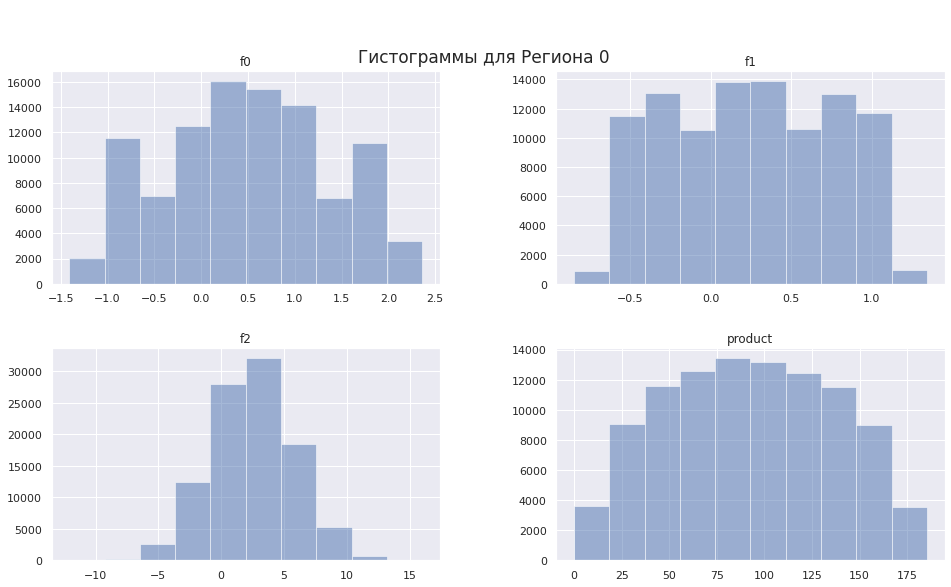

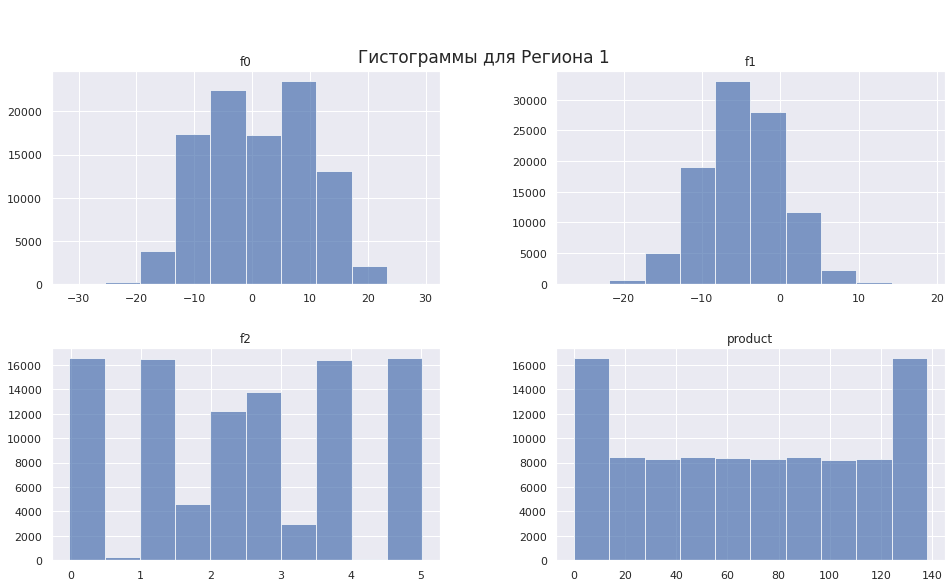

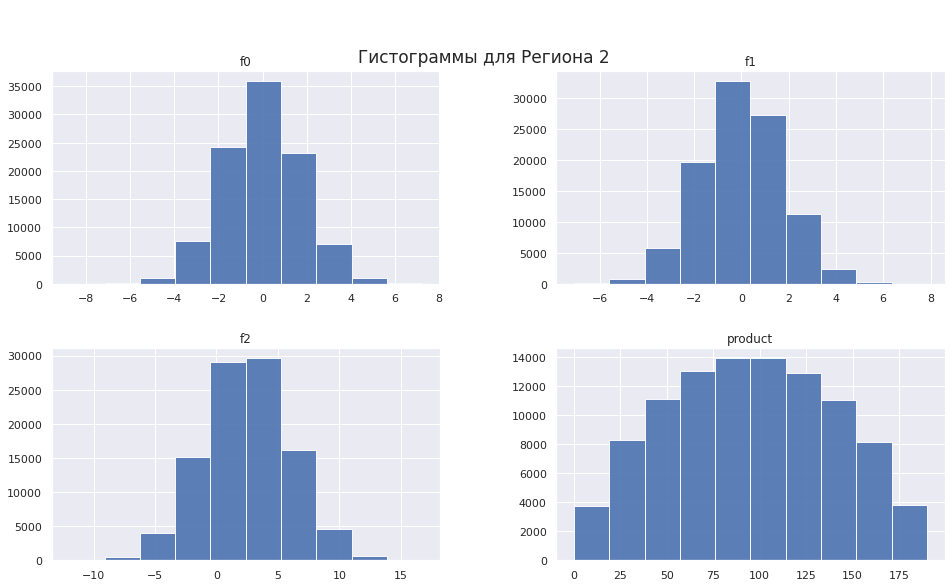

In [ ]:
data_0.hist(figsize = (16, 9), alpha = 0.5)
plt.suptitle("\n\nГистограммы для Региона 0\n\n", fontsize = 17)
plt.show()
data_1.hist(figsize = (16, 9), alpha = 0.7)
plt.suptitle("\n\nГистограммы для Региона 1\n\n", fontsize = 17)
plt.show()
data_2.hist(figsize = (16, 9), alpha = 0.9)
plt.suptitle("\n\nГистограммы для Региона 2\n\n", fontsize = 17)
plt.show()

### Построим матрицу рассеяния

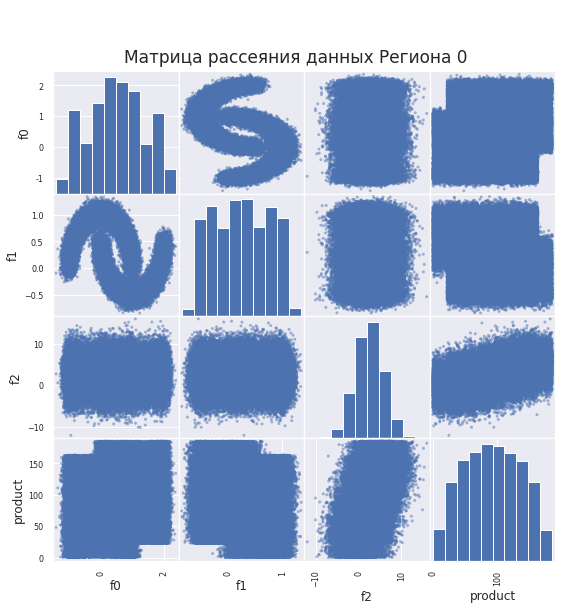

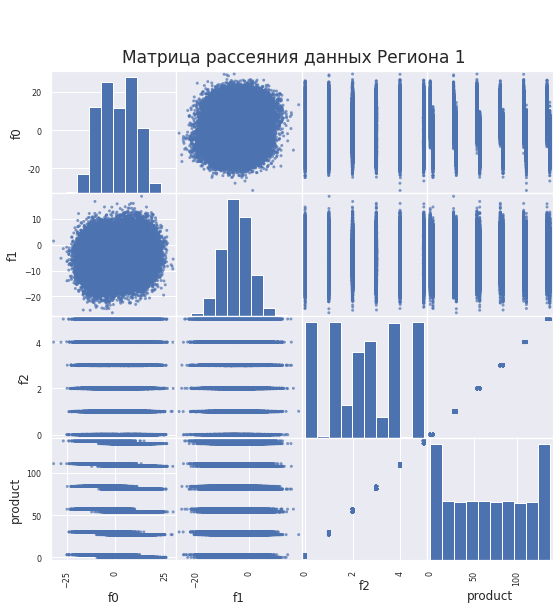

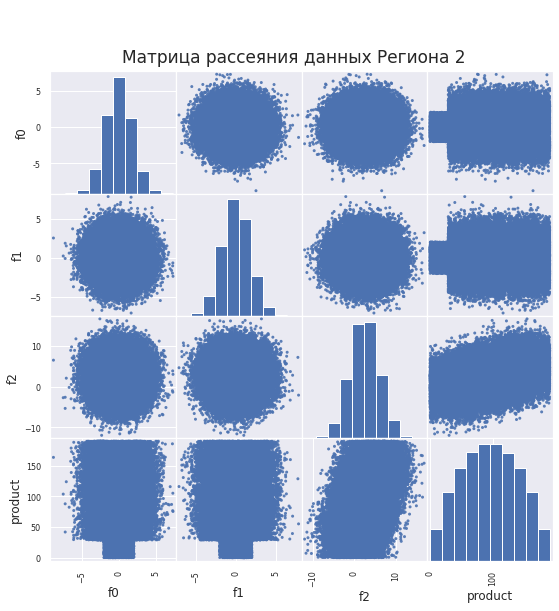

In [ ]:
pd.plotting.scatter_matrix(data_0, figsize = (9,9), alpha = 0.5)
plt.suptitle("\n\nМатрица рассеяния данных Региона 0\n", fontsize = 17)
plt.show()
pd.plotting.scatter_matrix(data_1, figsize = (9,9), alpha = 0.7)
plt.suptitle("\n\nМатрица рассеяния данных Региона 1\n", fontsize = 17)
plt.show()
pd.plotting.scatter_matrix(data_2, figsize = (9,9), alpha = 0.9)
plt.suptitle("\n\nМатрица рассеяния данных Региона 2\n", fontsize = 17)
plt.show()

### Построим зависимости данных

In [ ]:
print()
print("\n\nКорреляция данных Регион 0\n")
display(data_0.corr())
print()
print("\n\nКорреляция данных Регион 1\n")
display(data_1.corr())
print()
print("\n\nКорреляция данных Регион 2\n")
display(data_2.corr())




Корреляция данных Регион 0



,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000





Корреляция данных Регион 1



,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000





Корреляция данных Регион 2



,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


#### Графическое отображение зависимости данных

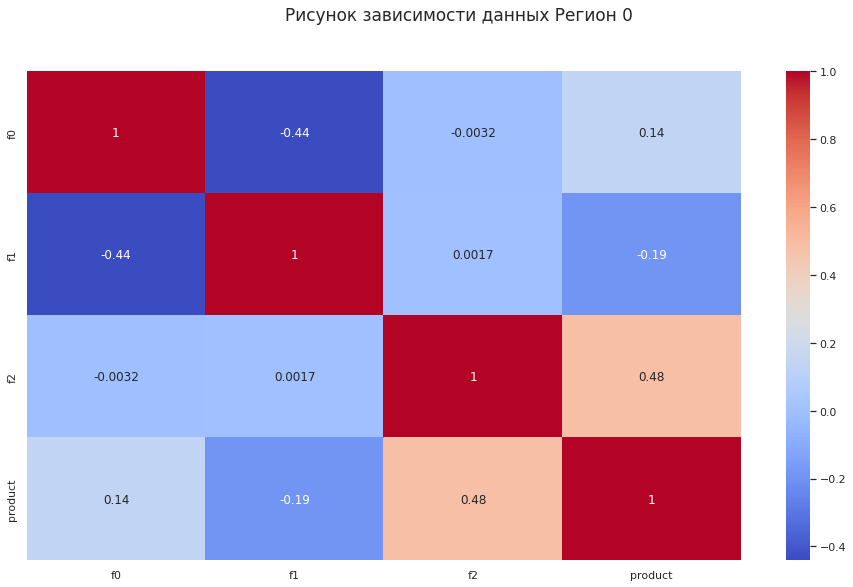

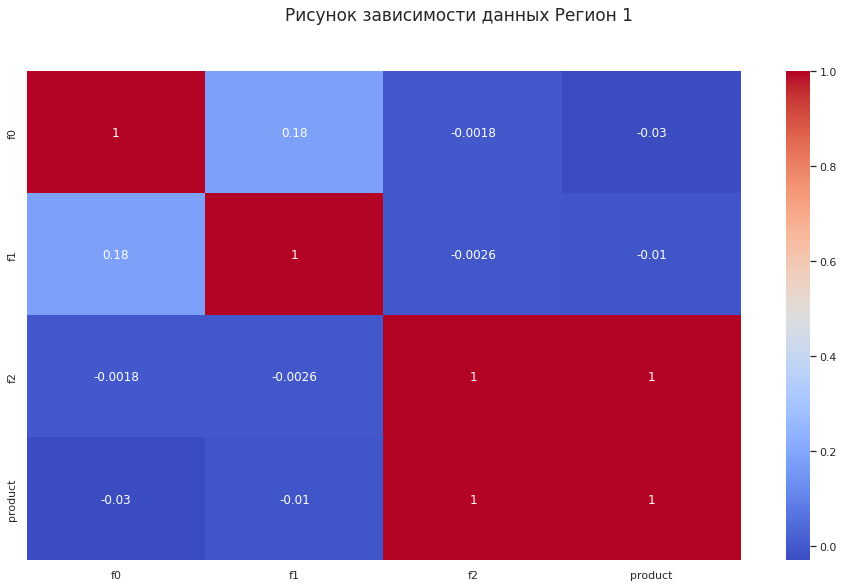

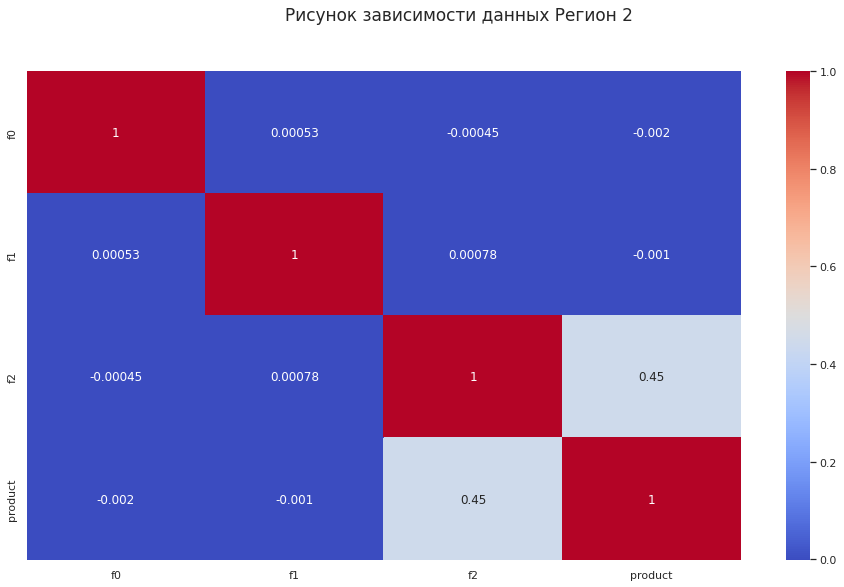

In [ ]:
print()
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(data_0.corr(), annot = True, cmap= 'coolwarm', ax=ax)
plt.suptitle("Рисунок зависимости данных Регион 0", fontsize = 17)
plt.show()
print()
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(data_1.corr(), annot = True, cmap= 'coolwarm', ax=ax)
plt.suptitle("Рисунок зависимости данных Регион 1", fontsize = 17)
plt.show()
print()
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(data_2.corr(), annot = True, cmap= 'coolwarm', ax=ax)
plt.suptitle("Рисунок зависимости данных Регион 2", fontsize = 17)
plt.show()

### Построим боксоплоты для выявления выбросов данных

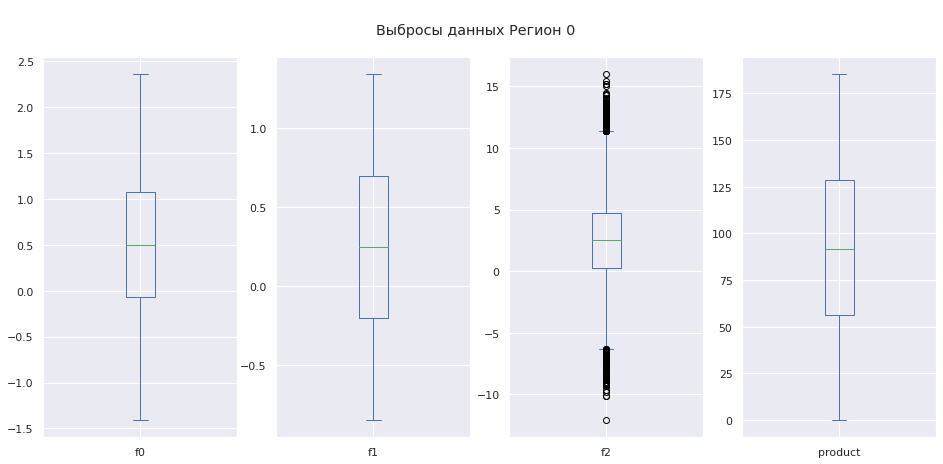

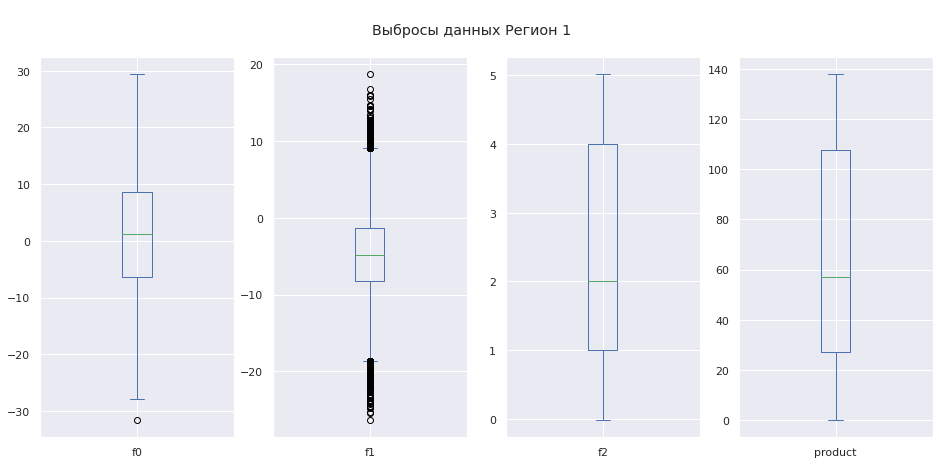

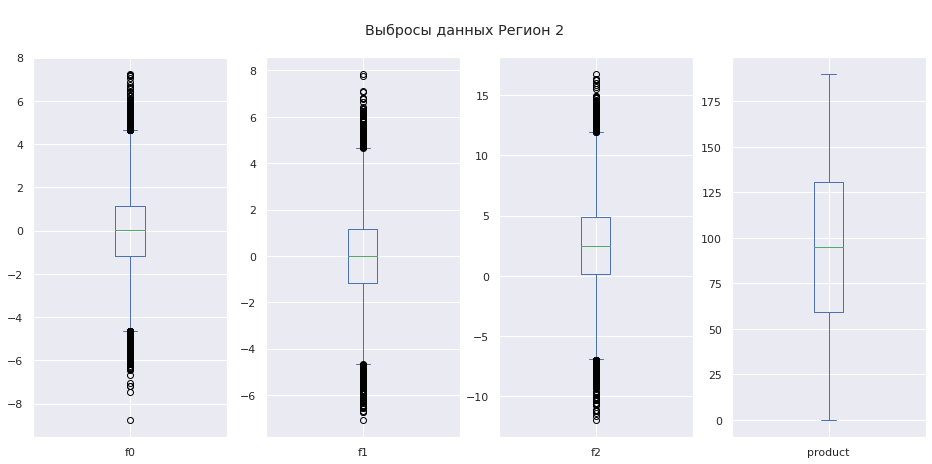

In [ ]:
data_0.plot(kind = 'box', subplots = True, figsize = (16,7), sharex = False, sharey = False)
plt.suptitle("\nВыбросы данных Регион 0")
plt.show()

data_1.plot(kind = 'box', subplots = True, figsize = (16,7), sharex = False, sharey = False)
plt.suptitle("\nВыбросы данных Регион 1")
plt.show()

data_2.plot(kind = 'box', subplots = True, figsize = (16,7), sharex = False, sharey = False)
plt.suptitle("\nВыбросы данных Регион 2")
plt.show()

#### Вывод

- Мы импортировали необходимые библиотеки, считали и проанализровали наборы данных.
- В наборе данных предоставлены пробы нефти из трёх регионов.
- По признакам наборы данных идентичны. Они содержат id скважины, 3 свойства, описывающие характеристики скважин и объём запасов нефти в каждой скважине. Каждый набор данных содержит по 100 тысяч наблюдений. 
- Мы имеем данные без аномалий, дубликатов и пропущенных значений. Поэтому предвартельная обработка не потребуется.

В ходе графического анализа данных выявили следующее:
- Данные распределены ненормально в Регион 0 и Регион 1, в Регион 2 данные распределены нормально.
- Наблюдается корреляция данных, особенно в Регион 1 между признаками f2 и product.
- Имеются выбросы в данных: Регион 0 по признаку f2, в данных Регион 1 по признаку f1, в данных Регион 2 по признакам f1, f2, f3.

# 2. Обучение и проверка модели

## Разобьём данные на обучающую и валидационную выборки в соотношении 75 : 25

In [ ]:
# Разделим таблицы на признаки и целевой признак
target_0 = data_0['product']
features_0 = data_0.drop(['product', 'id'] , axis=1)
features_train_0, features_valid_0, target_train_0, target_valid_0 = \
                    train_test_split(features_0, target_0, test_size=0.25, random_state=12345)

target_1 = data_1['product']
features_1 = data_1.drop(['product', 'id'] , axis=1)
features_train_1, features_valid_1, target_train_1, target_valid_1 = \
                    train_test_split(features_1, target_1, test_size=0.25, random_state=12345)

target_2 = data_2['product']
features_2 = data_2.drop(['product', 'id'] , axis=1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = \
                    train_test_split(features_2, target_2, test_size=0.25, random_state=12345)

# Проверим размеры созданных выборок
print('Размер таблицы "Признаки обучающей выборки Регион 0":', features_train_0.shape)
print('Размер таблицы "Признаки валидационной выборки Регион 0":', features_valid_0.shape)
print('Размер таблицы "Целевой признак обучающей выборки Регион 0":', target_train_0.shape)
print('Размер таблицы "Целевой признак валидационной выборки Регион 0":', target_valid_0.shape)
print()
print('Размер таблицы "Признаки обучающей выборки Регион 1":', features_train_1.shape)
print('Размер таблицы "Признаки валидационной выборки Регион 1":', features_valid_1.shape)
print('Размер таблицы "Целевой признак обучающей выборки Регион 1":', target_train_1.shape)
print('Размер таблицы "Целевой признак валидационной выборки Регион 1":', target_valid_1.shape)
print()
print('Размер таблицы "Признаки обучающей выборки Регион 2":', features_train_2.shape)
print('Размер таблицы "Признаки валидационной выборки Регион 2":', features_valid_2.shape)
print('Размер таблицы "Целевой признак обучающей выборки Регион 2":', target_train_2.shape)
print('Размер таблицы "Целевой признак валидационной выборки Регион 2":', target_valid_2.shape)


Размер таблицы "Признаки обучающей выборки Регион 0": (75000, 3)
Размер таблицы "Признаки валидационной выборки Регион 0": (25000, 3)
Размер таблицы "Целевой признак обучающей выборки Регион 0": (75000,)
Размер таблицы "Целевой признак валидационной выборки Регион 0": (25000,)

Размер таблицы "Признаки обучающей выборки Регион 1": (75000, 3)
Размер таблицы "Признаки валидационной выборки Регион 1": (25000, 3)
Размер таблицы "Целевой признак обучающей выборки Регион 1": (75000,)
Размер таблицы "Целевой признак валидационной выборки Регион 1": (25000,)

Размер таблицы "Признаки обучающей выборки Регион 2": (75000, 3)
Размер таблицы "Признаки валидационной выборки Регион 2": (25000, 3)
Размер таблицы "Целевой признак обучающей выборки Регион 2": (75000,)
Размер таблицы "Целевой признак валидационной выборки Регион 2": (25000,)


## Обучим модель и сделаем предсказания на валидационной выборке. Сохраним предсказания и правильные ответы на валидационной выборке

Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемы)

Для каждого регион обучим собственную модель.

In [ ]:
model_0 = LinearRegression()
model_1 = LinearRegression()
model_2 = LinearRegression()

model_0.fit(features_train_0, target_train_0)
model_1.fit(features_train_1, target_train_1)
model_2.fit(features_train_2, target_train_2)

predicted_valid_0 = model_0.predict(features_valid_0)
predicted_valid_1 = model_1.predict(features_valid_1)
predicted_valid_2 = model_2.predict(features_valid_2)

## Выведем средний запас предсказанного сырья и метрику машинного обычения RMSE (Root Mean Square Error - Квадратный корень среднеквадратичной ошибки)

In [ ]:
rmse_0 = mean_squared_error(target_valid_0, predicted_valid_0) ** 0.5
mean_product_0 = predicted_valid_0.mean().round(2)
print("Linear Regression Регион 0")
print("Средний запас предсказанного сырья:", mean_product_0, "тыс. баррелей")
print("RMSE =", rmse_0.round(4))
print()
rmse_1 = mean_squared_error(target_valid_1, predicted_valid_1) ** 0.5
mean_product_1 = predicted_valid_1.mean().round(2)
print("Linear Regression Регион 1")
print("Средний запас предсказанного сырья:", mean_product_1, "тыс. баррелей")
print("RMSE =", rmse_1.round(4))
print()
rmse_2 = mean_squared_error(target_valid_2, predicted_valid_2) ** 0.5
mean_product_2 = predicted_valid_2.mean().round(2)
print("Linear Regression Регион 2")
print("Средний запас предсказанного сырья:", mean_product_2, "тыс. баррелей")
print("RMSE =", rmse_2.round(4))

Linear Regression Регион 0
Средний запас предсказанного сырья: 92.59 тыс. баррелей
RMSE = 37.5794

Linear Regression Регион 1
Средний запас предсказанного сырья: 68.73 тыс. баррелей
RMSE = 0.8931

Linear Regression Регион 2
Средний запас предсказанного сырья: 94.97 тыс. баррелей
RMSE = 40.0297


Выведем информацию графически

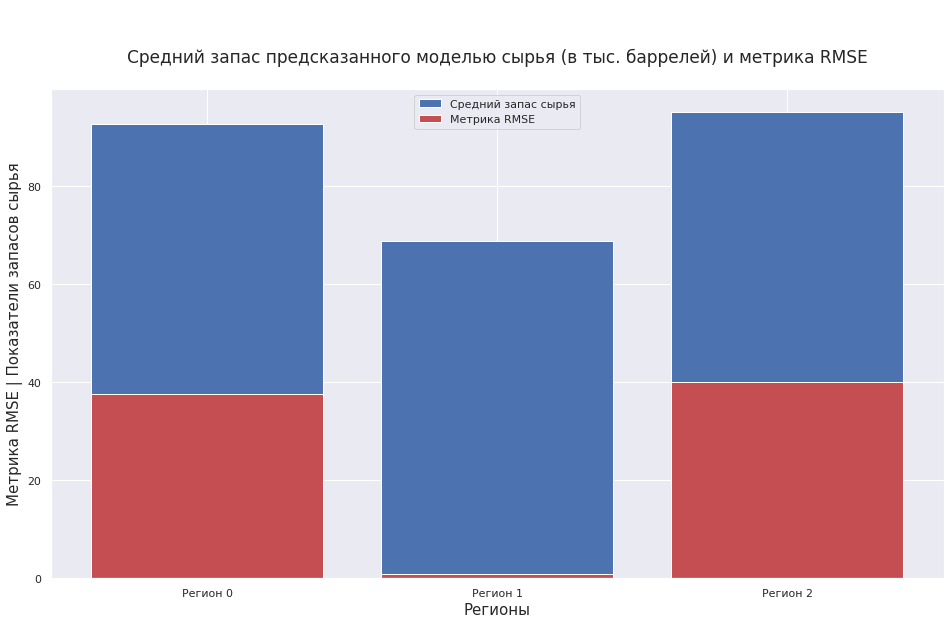

In [ ]:
from IPython.core.pylabtools import figsize
rmse = [rmse_0, rmse_1, rmse_2]
mean_product = [mean_product_0, mean_product_1, mean_product_2]
regions = ["Регион 0", "Регион 1","Регион 2"]
columns = ["region", "mean_product", "rmse"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (16, 9))

ax.bar(x = regions, height = mean_product, label = "Средний запас сырья")
ax.bar(x = regions, height = rmse, label = "Метрика RMSE", color = 'r')
ax.set_title("\n\nСредний запас предсказанного моделью сырья (в тыс. баррелей) и метрика RMSE\n", fontsize = 17)
ax.legend()
plt.xlabel("Регионы", fontsize = 15)
plt.ylabel("Метрика RMSE | Показатели запасов сырья", fontsize = 15)
plt.show()

### Вывод

- Мы произвели разделение данных на тренировочную и валидационную выборки. Соотношение выборок 75% и 25% соответственно.
- Для предсказания объёмов добычи нефти в трёх регионах построили модель машинного обучения LinearRegression - Линейная регрессия. Для каждого региона мы рассчитали средний запас предсказанного сырья и определили метрику RMSE (Root Mean Square Error - Квадратный корень среднеквадратичной ошибки). Метрики RMSE трёх регионов были сохранены в уникальные переменные.

1. Регион 2 имеет наибольший предсказанный запас сырья 94.97 тыс. баррелей, с RMSE - корень от среднеквадратичной ошибки 40.02.
2. Регион 0 имеет предсказанный запас сырья 92.59 тыс. баррелей, с RMSE 37.57.
3. Регион 1 имеет наименьший предсказанный запас сырья 68.73 тыс. баррелей, но и с наименьшим корнем от среднеквадратичной ошибки RMSE 0.89. 

- Чем меньше показать RMSE, тем точнее прогноз модели машинного обучения.
- Прогноз модели LinearRegression в регионе 1 имеет наименьшую метрику RMSE. Это означает, что в Регион 1 мы получили наиболее подходящий результат.

# 3. Подготовка к расчёту прибыли

Сохраним в отдельных переменных ключевые значения для расчётов 

In [ ]:
all_points = 500 # Общее количество скважин, которые разрабатываются в исследуемом регионе
top_points = 200 # Количество наиболее богатых скважин, которые разарабатываются по итогам исследования региона
budget = 10_000_000 # Бюджет на разработку скважин в регионе. 
# 10 миллиардов рублей равно 10 000 000 тысяч, так как доход в единицах измерения тыс.руб.
income_per_one = 450 # Доход с одной единицы сырья (1 тысяча баррелей нефти) в тысячах рублей

predictions_0 = pd.Series(model_0.predict(features_valid_0), index = features_valid_0.index)
predictions_1 = pd.Series(model_1.predict(features_valid_1), index = features_valid_1.index)
predictions_2 = pd.Series(model_2.predict(features_valid_2), index = features_valid_2.index)


Для каждого региона  определим необходимый объём добычи нефти для точки безубыточности. Это сумма дохода от продажи нефти равная бюджету на освоение новых месторождений. По условию проекта из 500 исследуемых месторождений в разработку поступают только 200 скважин.

In [ ]:
def break_even(predictions, mean_value, rmse):
    extraction_volume = 0 # Объём добычи нефти
    income = 0 #  Доход 
    counter = 0 # Счётчик количества скважин
    for i in predictions.sort_values(ascending = False)[:top_points]:
        if income < (budget / 1_000_000):
            extraction_volume += i
            income += ((i * income_per_one) / 1_000_000)
            counter += 1
        else:
            break
    # Требуемый объём нефти        
    required_volume = extraction_volume / counter
    # Оставшиейся скважины
    free_wells = top_points - counter
    # Безубыточный объём 
    breakeven_volume = extraction_volume / top_points
    # Доход от одной скважины
    add_income_per_one = ((extraction_volume / counter) * income_per_one) / 1_000_000
    # Доход от добычи нефти оставшихся скважин
    add_income_total = ((top_points - counter) * income_per_one * mean_value) / 1_000_000

    print("Точка безубыточности достигается при объёме добычи нефти в", round(extraction_volume, 2),
          "тысяч баррелей. Компания получит доход:", round(income, 2), "млрд. рублей")
    print("Количество месторождений не менее:", counter, "скважин")
    print("Среднее количество нефти в каждом месторождение:", required_volume, "тысяч баррелей")
    print("В данном регионе, согласно прогнозу модели, в каждой скважине залегает нефти в среднем:", 
          round(mean_value, 2), "тысяч баррелей")
    print("В регионе точкой безубыточности по добыче нефти на одну скважину:", round(breakeven_volume, 2), "тысяч баррелей")
    print("Останется неразработанных скважин после достяжения точки безубыточности:", free_wells, "штук")
    print("Разработка каждой новой скважины принесёт доход:", round(add_income_per_one, 2), "млрд. рублей")
    print("Разработка оставшихся скважин позволит получить доход:", round(add_income_total, 2), "млрд. рублей")
    print("В среднем Модель ошибается в предсказаниях нефти на скважину на:", round(rmse, 2),  "тысяч баррелей")

    return (extraction_volume, 
            income, 
            counter, 
            required_volume, 
            breakeven_volume, 
            free_wells, 
            add_income_per_one, 
            add_income_total)


Посчитаем точку безубыточности для Региона 0

In [ ]:
(extraction_volume_0, 
income_0, 
counter_0, 
required_volume_0, 
breakeven_volume_0, 
free_wells_0, 
add_income_per_one_0, 
add_income_total_0,) = break_even(predictions_0, mean_product_0, rmse_0)

Точка безубыточности достигается при объёме добычи нефти в 22268.06 тысяч баррелей. Компания получит доход: 10.02 млрд. рублей
Количество месторождений не менее: 141 скважин
Среднее количество нефти в каждом месторождение: 157.92948507100863 тысяч баррелей
В данном регионе, согласно прогнозу модели, в каждой скважине залегает нефти в среднем: 92.59 тысяч баррелей
В регионе точкой безубыточности по добыче нефти на одну скважину: 111.34 тысяч баррелей
Останется неразработанных скважин после достяжения точки безубыточности: 59 штук
Разработка каждой новой скважины принесёт доход: 0.07 млрд. рублей
Разработка оставшихся скважин позволит получить доход: 2.46 млрд. рублей
В среднем Модель ошибается в предсказаниях нефти на скважину на: 37.58 тысяч баррелей


Посчитаем точку безубыточности для Региона 1

In [ ]:
(extraction_volume_1, 
income_1, 
counter_1, 
required_volume_1, 
breakeven_volume_1, 
free_wells_1, 
add_income_per_one_1, 
add_income_total_1,) = break_even(predictions_1, mean_product_1, rmse_1)

Точка безубыточности достигается при объёме добычи нефти в 22346.41 тысяч баррелей. Компания получит доход: 10.06 млрд. рублей
Количество месторождений не менее: 161 скважин
Среднее количество нефти в каждом месторождение: 138.7975477760514 тысяч баррелей
В данном регионе, согласно прогнозу модели, в каждой скважине залегает нефти в среднем: 68.73 тысяч баррелей
В регионе точкой безубыточности по добыче нефти на одну скважину: 111.73 тысяч баррелей
Останется неразработанных скважин после достяжения точки безубыточности: 39 штук
Разработка каждой новой скважины принесёт доход: 0.06 млрд. рублей
Разработка оставшихся скважин позволит получить доход: 1.21 млрд. рублей
В среднем Модель ошибается в предсказаниях нефти на скважину на: 0.89 тысяч баррелей


Посчитаем точку безубыточности для Региона 2

In [ ]:
(extraction_volume_2, 
income_2, 
counter_2, 
required_volume_2, 
breakeven_volume_2, 
free_wells_2, 
add_income_per_one_2, 
add_income_total_2,) = break_even(predictions_2, mean_product_2, rmse_2)

Точка безубыточности достигается при объёме добычи нефти в 22307.07 тысяч баррелей. Компания получит доход: 10.04 млрд. рублей
Количество месторождений не менее: 149 скважин
Среднее количество нефти в каждом месторождение: 149.71185043131663 тысяч баррелей
В данном регионе, согласно прогнозу модели, в каждой скважине залегает нефти в среднем: 94.97 тысяч баррелей
В регионе точкой безубыточности по добыче нефти на одну скважину: 111.54 тысяч баррелей
Останется неразработанных скважин после достяжения точки безубыточности: 51 штук
Разработка каждой новой скважины принесёт доход: 0.07 млрд. рублей
Разработка оставшихся скважин позволит получить доход: 2.18 млрд. рублей
В среднем Модель ошибается в предсказаниях нефти на скважину на: 40.03 тысяч баррелей


Визуализируем полученные результаты

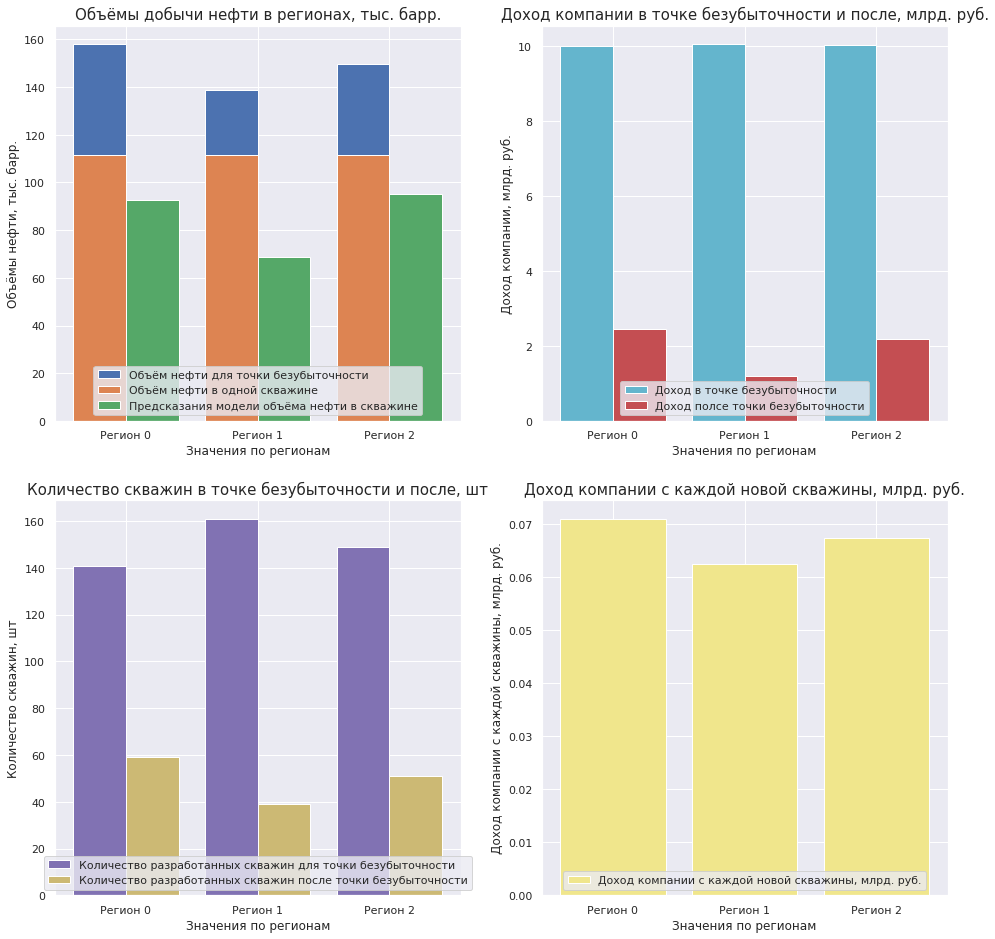

In [ ]:
extraction_volume = [extraction_volume_0, extraction_volume_1, extraction_volume_2]
income = [income_0, income_1, income_2]
counter = [counter_0, counter_1, counter_2]
required_volume = [required_volume_0, required_volume_1, required_volume_2]
breakeven_volume = [breakeven_volume_0, breakeven_volume_1, breakeven_volume_2]
free_wells = [free_wells_0, free_wells_1, free_wells_2]
add_income_per_one = [add_income_per_one_0, add_income_per_one_1, add_income_per_one_2]
add_income_total =[ add_income_total_0, add_income_total_1, add_income_total_2]
regions = ["Регион 0", "Регион 1", "Регион 2"]

fig, ax = plt.subplots(2, 2, figsize = (16, 16))

# Объёмы добычи нефти в регионах

x = np.arange(len(regions))
col_1 = ax[0][0].bar(x - 0.4/2, width = 0.4, height = required_volume, 
                     label = "Объём нефти для точки безубыточности")
col_2 = ax[0][0].bar(x - 0.4/2, width = 0.4, height = breakeven_volume, 
                     label = "Объём нефти в одной скважине")
col_3 = ax[0][0].bar(x + 0.4/2, width = 0.4, height = mean_product, 
                     label = "Предсказания модели объёма нефти в скважине")
ax[0][0].set_title("Объёмы добычи нефти в регионах, тыс. барр.", size = 15)
ax[0][0].set_xlabel("Значения по регионам")
ax[0][0].set_ylabel("Объёмы нефти, тыс. барр.")
ax[0][0].set_xticks(x)
ax[0][0].set_xticklabels(regions)
ax[0][0].legend(loc = "lower center")

# Доход компании в точке безубыточности и после, млрд. руб.
col_1 = ax[0][1].bar(x - 0.4/2, width = 0.4, height = income, 
                     label = "Доход в точке безубыточности", color = "c")
col_2 = ax[0][1].bar(x + 0.4/2, width = 0.4, height = add_income_total, 
                     label = "Доход полсе точки безубыточности", color = "r")
ax[0][1].set_title("Доход компании в точке безубыточности и после, млрд. руб.", size = 15)
ax[0][1].set_xlabel("Значения по регионам")
ax[0][1].set_ylabel("Доход компании, млрд. руб.")
ax[0][1].set_xticks(x)
ax[0][1].set_xticklabels(regions)
ax[0][1].legend(loc = "lower center")

# Количество разработанных скважин "для" и "после" точки безубыточности
col_1 = ax[1][0].bar(x - 0.4/2, width = 0.4, height = counter, 
                     label = "Количество разработанных скважин для точки безубыточности", color = "m")
col_2 = ax[1][0].bar(x + 0.4/2, width = 0.4, height = free_wells, 
                     label = "Количество разработанных скважин после точки безубыточности", color = "y")
ax[1][0].set_title("Количество скважин в точке безубыточности и после, шт", size = 15)
ax[1][0].set_xlabel("Значения по регионам")
ax[1][0].set_ylabel("Количество скважин, шт")
ax[1][0].set_xticks(x)
ax[1][0].set_xticklabels(regions)
ax[1][0].legend(loc = "lower center")

# Доход компании с каждой новой скважины, млрд. руб.
col_1 = ax[1][1].bar(x, height = add_income_per_one, 
                     label = "Доход компании с каждой новой скважины, млрд. руб.", color = "khaki")

ax[1][1].set_title("Доход компании с каждой новой скважины, млрд. руб.", size = 15)
ax[1][1].set_xlabel("Значения по регионам")
ax[1][1].set_ylabel("Доход компании с каждой скважины, млрд. руб.")
ax[1][1].set_xticks(x)
ax[1][1].set_xticklabels(regions)
ax[1][1].legend(loc = "lower center")

plt.show()

### Вывод

Мы сохранили ряд ключевых констант, которые потребуются при расчёте прибыли и рисков. Определили точку безубыточности и другие бизнес-метрики, на основе которых можно принять решение о регионе, в котором будут вести разработки месторождений.

Для достижения точки безубыточности компании необходимо разведать не менее:
- 141 месторождения в Регионе 0, 
- 161 месторождения в Регионе 1,
- 149 месторождений в Регионе 2.

По регионам 0, 1, 2 в каждой скважине в среднем должно быть, соответсвенно, около:
- 157.93 тысяч баррелей нефти, 
- 138.80 тысяч баррелей нефти,
- 149.71 тысяч баррелей нефти.

Построенная модель предсказала средние запасы нефти в скважине:
- 148.37 тысяч баррелей нефти в Регионе 0,
- 138.39 тысяч баррелей нефти в Регионе 1,
- 142.33 тысяч баррелей нефти в Регионе 2.

Модель машинного обучения ошибается в предсказаниях в среднем на:
- 28.23 тысяч баррелей нефти в Регионе 0, 
- 0.580 тысяч баррелей нефти в Регионе 1,
- 30.76 тысяч баррелей нефти в Регионе 2.

При этом останется для разработки скважин, шт:
- 59 скважин в Регионе 0, 
- 39 скважин в Регионе 1, 
- 51 скважин в Регионе 2.

Разработка каждой новой скважины принесёт компании:
- 0.07 млрд. руб. в Регионе 0, 
- 0.06 млрд. руб. в Регионе 1, 
- 0.07 млрд. руб. в Регионе 2.

Разработка всех оставшихся скважин принесёт компании:
- 3.94 млрд. руб. в Регионе 0, 
- 2.43 млрд. руб. в Регионе 1, 
- 3.27 млрд. руб. в Регионе 2.

При указанном количестве скважин, необходимых к разработке, а также при требуемом среднем объёме запасов нефти в каждой скважине, компания получит доход в размере:
- 10.02 млрд. руб. в Регионе 0, 
- 10.06 млрд. руб. в Регионе 1,
- 10.04 млрд. руб. в Регионе 2. 

Это на 0.02 млрд.руб., 0.06 млрд.руб. и 0.04 млрд.руб. больше, чем требуется для достижения точки безубыточности, в 0, 1 и 2 регионах соответственно.

В каждом регионе может быть выбрано для разработки 200 скважин. Поэтому мы рассчитали требуемый, для выхода на точку безубыточности, объём нефти из расчёта на 200 месторождений:
- 111.34 тыс. баррелей нефти для Региона 0, 
- 111.73 тыс. баррелей нефти для Региона 1, 
- 111.54 тыс. баррелей нефти для Региона 2. 

В каждом регионе требуемый для выхода на точку безубыточности объём нефти из расчёта на 200 месторождений выше средних объёмов запасов нефти, предсказанных моделью.

Требуемый для достижения точки безубыточности предсказанный средний объём нефти в скважине при заданном количестве месторождений и необходимом объёме нефти в каждом из них недостаточен для выхода в точку безубыточности в каждом из регионов.

При расчёте требуемого для выхода на точку безубыточности объёма нефти из расчёта на 200 месторождений использовались все предсказанные моделью запасы нефти в регионе - большие и небольшие. Соответственно, регионы с низкими величинами запасов нефти снижали требуемый для выхода на точку безубыточности объём нефти. Поэтому из всех предсказаний необходимо отобрать 200 с наибольшими запасами нефти и оценивать по ним прибыль и риски.

# 4. Расчёт прибыли и рисков

Мы имеем предсказанные объёмы нефти в каждой скважине и истинные значения объёмов нефти для этих скважин.

В пределах бюджета может быть разработано 200 скважин. В переменных predictions_0, predictions_1 и predictions_2 собраны по 500 предсказаний объёмов нефти, построенные моделью и отсортированные в порядке убывания их объёма.

Чтобы посчитать прибыль, необходимо посчитать прибыль, которую могла бы получить компания, если бы она разведала 200 определённых моделью скважин и извлекла из них предсказанный объём нефти, и сравнить это значение с прибылью, рассчитанной на истинных данных.

Создадим функцию, которая будет принимать на вход предсказания и правильные ответы и рассчитывать необходимое значение прибыли.

In [ ]:
def profit(predictions, target):
    predictions = predictions.sort_values(ascending = False)
    top_200 = target.loc[predictions.index][:200]
    product = top_200.sum() # суммарное количество сырья с топ - 200 точек
    income = product * income_per_one / 1_000_000
    profit = income - (budget / 1_000_000)
    return profit

In [ ]:
profit_0 = profit(predictions_0, target_valid_0).round(2)
print(f"Прибыль в Регионе 0: {profit_0} млрд. руб.")
profit_1 = profit(predictions_1, target_valid_1).round(2)
print(f"Прибыль в Регионе 1: {profit_1} млрд. руб.")
profit_2 = profit(predictions_2, target_valid_2).round(2)
print(f"Прибыль в Регионе 2: {profit_2} млрд. руб.")

Прибыль в Регионе 0: 3.32 млрд. руб.
Прибыль в Регионе 1: 2.42 млрд. руб.
Прибыль в Регионе 2: 2.71 млрд. руб.


Наиболее прибыльным является Регион 0: 
при разработке скважин в этом регионе компания получит прибыль в размере 3.32 млрд. руб. 

*Отметим, что прибыль в данном случае - это разница между совокупным доходом и бюджетом на освоение региона.

Наименее прибыльным регионом является Регион 1: 
при разработке скважин в этом регионе компания получит прибыль в размере 2.42 млрд. руб.

Данные величины прибыли получены с допущением, что из всех 25 000 скважин, которые есть в регионе, мы разведываем 200 с наибольшими запасами нефти.

На практике такое будет случаться не всегда, поэтому применим технику Bootstrap и узнаем более вероятное значение прибыли при разработке месторождений в том или ином регионе, а также вероятность получения прибыли в случае проведения работ в регионе.

Для этого построим распределение прибыли, используя бутстрапирование с 1000 выборок: из набора данных с предсказаниями объёма добычи нефти для каждого региона случайным обазом 1000 раз отберём 200 скважин и посчитаем прибыль, которую получит компания при разработке этих скважин. 

Затем посчитаем среднее значение прибыли из 1000 значений прибыли для бутстрапированных выборок и определим 95% - интервал для этого среднего значения.

Напишем соответствующую функцию.

Функция будет принимать на вход набор с предсказанными и истинными объёмами запасов нефти в каждой скважине.

Алгоритм функции:

1. Формирует бутстрапированные выборки в количестве 1000 единиц, при этом в каждой выборке будет по 500 скважин.


2. Каждую из 1000 выборок передаёт функции profit, получает из неё значение прибыли и добавляет его в список profit_list.


3. Рассчитывает среднее значение бутстрапированной прибыли, 95% доверительный интервал для этого среднего значения, а также стандартную ошибку среднего.


4. Дополнительно определяет интервал, в котором будет лежать 95% значений бутстрапированной прибыли, а также размах этого интервала.


5. Определяет вероятность получения убытков при работе в исследуемом регионе.


6. Визуализирует распределение значений бутстрапированной прибыли.

In [ ]:
def functionBootstrap(predictions, target):
    state = np.random.RandomState(12345)
    
    values = []
    for i in range(1000):
        target_subsample = target.sample(n = 500, replace = True, random_state = state)
        pred_subsample = predictions.loc[target_subsample.index]    
        values.append(profit(pred_subsample, target_subsample))

    values = pd.Series(values)

    lower = round(values.quantile(0.05), 3)
    upper = round(values.quantile(0.95), 3)

    mean = round(values.mean(), 3)

    negative_profit_chance = (values < 0).mean()
    
    print(f"Средняя прибыль: {mean} млрд. руб.")
    print(f"Доверительный интервал прибыли: от {lower} млрд. руб., до {upper} млрд. руб.")
    print(f"Вероятность получить убыток: {negative_profit_chance}")
    print()
    plt.hist(values, bins = 50, color = "c")
    plt.suptitle("Распределение прибыли из бутстрапированных выборок имеет сделующий вид", fontsize = 15)
    plt.xlabel("Прибыль, млрд. руб.")
    plt.ylabel("Количество скважин")
    plt.show()
  

Расчёт прибыли и рисков для Регион 0:
Средняя прибыль: 0.426 млрд. руб.
Доверительный интервал прибыли: от -0.032 млрд. руб., до 0.881 млрд. руб.
Вероятность получить убыток: 0.06



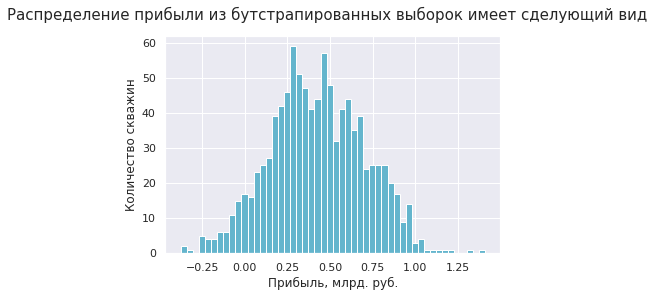

In [ ]:
print("Расчёт прибыли и рисков для Регион 0:")
functionBootstrap(predictions_0, target_valid_0)

Расчёт прибыли и рисков для Регион 1:
Средняя прибыль: 0.515 млрд. руб.
Доверительный интервал прибыли: от 0.151 млрд. руб., до 0.862 млрд. руб.
Вероятность получить убыток: 0.01



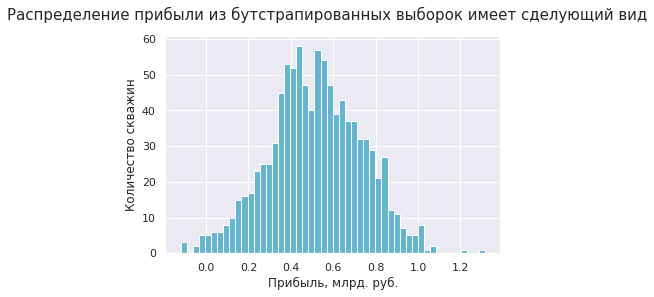

In [ ]:
print("Расчёт прибыли и рисков для Регион 1:")
functionBootstrap(predictions_1, target_valid_1)

Расчёт прибыли и рисков для Регион 2:
Средняя прибыль: 0.435 млрд. руб.
Доверительный интервал прибыли: от -0.043 млрд. руб., до 0.898 млрд. руб.
Вероятность получить убыток: 0.064



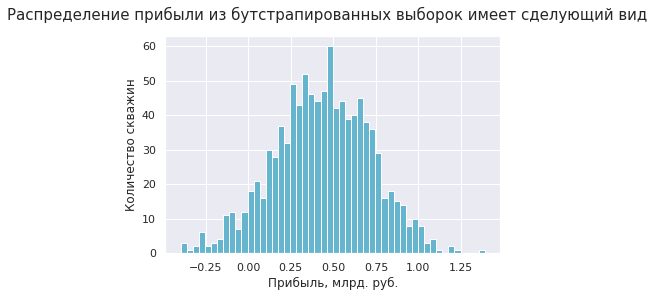

In [ ]:
print("Расчёт прибыли и рисков для Регион 2:")
functionBootstrap(predictions_2, target_valid_2)

### Вывод
- Регион 0: 
 - средняя прибыль 0.426 млрд. рублей
 - 5 % - квантиль -0.032 млрд. рублей
 - 95 % - квантиль 0.881 млрд. рублей
 - Риск получить убыток 6 %


- Регион 1:
 - средняя прибыль 0.515 млрд. рублей
 - 5 % - квантиль 0.069 млрд. рублей
 - 95 % - квантиль 0.932 млрд. рублей
 - Риск получить убыток 1 %


- Регион 2:
 - средняя прибыль 0.435 млрд. рублей
 - 5 % - квантиль -0.129 млрд. рублей
 - 95 % - квантиль 0.97 млрд. рублей
 - Риск получить убыток 6.4 % 


Регион 0 и Регион 2 имеют риски получения убытков 6 % и выше со средней прибылью 0.426 и 0.435 млрд. рублей соответственно.
Регион 1, со средней прибылью 0.515 млрд. рублей, почти не подвержен риску убытков - 1 %.

**На основании проведенных исследований для разработки скважин предлагаем Регион 1. В этой местности разработка имеет минимальные риски убытков и предполагает наибольшую прибыль от добычи нефти.**

## Итог

Мы решили в каком регионе, из трёх предложенных, наиболее выгодно бурить скважины.

В процессе исследований мы использовали пробы нефти из трёх регионов. В каждом регионе по 10 тысяч месторождений. Измерили качество нефти и объём запасов.

Мы построили модель машинного обучения линейная регрессия (LinearRegression), которая предсказывает регион с наибольшей прибылью.

Работу над проектом мы вели по плану:

- Импорт библиотек. Загрузка и подготовка данных. Анализ.
- Обучение и проверка модели.
- Подготовка к расчёту прибыли.
- Расчёт прибыли и рисков.


### Импорт библиотек. Загрузка и подготовка данных. Анализ

На данном этапе мы импортировали необходимые библиотеки, а также считали и проанализировали предоставленные наборы данных.

В наборе данных представлены пробы нефти в трёх регионах. По составу наборы данных идентичны друг другу: все три набора данных содержат id скважины, 3 параметра, описывающие некоторые характеристики скважин, а также объём запасов нефти в скважине (в тыс. баррелей).

Каждый набор данных сожержит по 100 тыс. наблюдений.

Данные не содержат аномалий, дубликатов или пропущенных значений, поэтому их предварительная обработка не требуется.


### Обучение и проверка модели

Мы разделили наборы данных на тренировочную и валидационную выборки в соотношении 75 % : 25 %.

Для предсказания объёмов добычи нефти для всех трёх регионов мы построили модель линейной регрессии. Для каждого региона мы расчитали средний запас предсказанного сырья, а также определили метрику RMSE. RMSE и средний запас предсказанного сырья мы оценивали для топ-200 месторождений.

Оптимальное предсказание мы построили для Регион 1. Предсказанный средний запас сырья составил 68.73 тыс.баррелей. Данное предсказание имеет низкое значение ошибки. В среднем, при предсказывании объёма добычи нефти в скважине ошибка модели составляет 0.89 тыс. баррелей.

Данный прогноз предсказывает меньшие по сравнению с другими регионами объёмы добычи нефти, однако это предсказание более точное относительно других регионов.

Регионом с наибольшим риском - можно назвать Регион 2: модель предсказала средний объём добываемой нефти в размере 94.97 тыс. баррелей, при этом в среднем модель ошибается на 40.02 тыс. баррелей при предсказании объёма добычи нефти. Модель предсказывает достаточно высокие объёмы добычи нефти относительно Региона 1, однако эта модель допускает более высокую погрешность при предсказаннии объёмов добычи нефти.


### Подготовка к расчёту прибыли

Мы сохранили ряд ключевых констант, которые потребуются при расчёте прибыли и рисков. Определили точку безубыточности и другие бизнес-метрики, на основе которых можно принять решение о регионе, в котором будут вести разработки месторождений.

Для достижения точки безубыточности компании необходимо разведать не менее:
- 141 месторождения в Регионе 0, 
- 161 месторождения в Регионе 1,
- 149 месторождений в Регионе 2.

По регионам 0, 1, 2 в каждой скважине в среднем должно быть, соответсвенно, около:
- 157.93 тысяч баррелей нефти, 
- 138.80 тысяч баррелей нефти,
- 149.71 тысяч баррелей нефти.

Построенная модель предсказала средние запасы нефти в скважине:
- 148.37 тысяч баррелей нефти в Регионе 0,
- 138.39 тысяч баррелей нефти в Регионе 1,
- 142.33 тысяч баррелей нефти в Регионе 2.

Модель машинного обучения ошибается в предсказаниях в среднем на:
- 28.23 тысяч баррелей нефти в Регионе 0, 
- 0.580 тысяч баррелей нефти в Регионе 1,
- 30.76 тысяч баррелей нефти в Регионе 2.

При этом останется для разработки скважин, шт:
- 59 скважин в Регионе 0, 
- 39 скважин в Регионе 1, 
- 51 скважин в Регионе 2.

Разработка каждой новой скважины принесёт компании:
- 0.07 млрд. руб. в Регионе 0, 
- 0.06 млрд. руб. в Регионе 1, 
- 0.07 млрд. руб. в Регионе 2.

Разработка всех оставшихся скважин принесёт компании:
- 3.94 млрд. руб. в Регионе 0, 
- 2.43 млрд. руб. в Регионе 1, 
- 3.27 млрд. руб. в Регионе 2.

При указанном количестве скважин, необходимых к разработке, а также при требуемом среднем объёме запасов нефти в каждой скважине, компания получит доход в размере:
- 10.02 млрд. руб. в Регионе 0, 
- 10.06 млрд. руб. в Регионе 1,
- 10.04 млрд. руб. в Регионе 2. 

Это на 0.02 млрд.руб., 0.06 млрд.руб. и 0.04 млрд.руб. больше, чем требуется для достижения точки безубыточности, в 0, 1 и 2 регионах соответственно.

В каждом регионе может быть выбрано для разработки 200 скважин. Поэтому мы рассчитали требуемый, для выхода на точку безубыточности, объём нефти из расчёта на 200 месторождений:
- 111.34 тыс. баррелей нефти для Региона 0, 
- 111.73 тыс. баррелей нефти для Региона 1, 
- 111.54 тыс. баррелей нефти для Региона 2. 

В каждом регионе требуемый для выхода на точку безубыточности объём нефти из расчёта на 200 месторождений выше средних объёмов запасов нефти, предсказанных моделью.

Требуемый для достижения точки безубыточности предсказанный средний объём нефти в скважине при заданном количестве месторождений и необходимом объёме нефти в каждом из них недостаточен для выхода в точку безубыточности в каждом из регионов.

При расчёте требуемого для выхода на точку безубыточности объёма нефти из расчёта на 200 месторождений использовались все предсказанные моделью запасы нефти в регионе - большие и небольшие. Соответственно, регионы с низкими величинами запасов нефти снижали требуемый для выхода на точку безубыточности объём нефти. Поэтому из всех предсказаний необходимо отобрать 200 с наибольшими запасами нефти и оценивать по ним прибыль и риски.


### Расчёт прибыли и рисков

На данном этапе мы рассчитали возможную прибыль от разработки регионов и оценили риски проведения работ в этих регионах.

- Регион 0: 
 - средняя прибыль 0.426 млрд. рублей
 - 5 % - квантиль -0.032 млрд. рублей
 - 95 % - квантиль 0.881 млрд. рублей
 - Риск получить убыток 6 %


- Регион 1:
 - средняя прибыль 0.515 млрд. рублей
 - 5 % - квантиль 0.069 млрд. рублей
 - 95 % - квантиль 0.932 млрд. рублей
 - Риск получить убыток 1 %


- Регион 2:
 - средняя прибыль 0.435 млрд. рублей
 - 5 % - квантиль -0.129 млрд. рублей
 - 95 % - квантиль 0.97 млрд. рублей
 - Риск получить убыток 6.4 % 


Регион 0 и Регион 2 имеют риски получения убытков 6 % и выше со средней прибылью 0.426 и 0.435 млрд. рублей соответственно.
Регион 1, со средней прибылью 0.515 млрд. рублей, почти не подвержен риску убытков - 1 %.

Таким образом, учитывая анализ прибыльности каждого из регионов, а также сопряжённые с работой в регионах риски, можно говорить о том, что наиболее подходящим для разработки месторождений будет Регион 1. Для этого региона характерно наибольшее среди других регионов среднее значение бутстрапированной прибыли, при этом доверительный интервал для истинного среднего значения бутстрапированной прибыли уже, чем интервалы для других регионов. Также для этого региона характерна наименьшая вероятность получения убытка.